In [2]:
import DuckDuckGoImages as ddg
ddg.download('bernie twitter mitten meme',folder='F:/Data_Dumping/bernie',max_urls=250)

154

In [57]:

def changenamejpg(folder_path,change_name): 
    import os 
    folder_path=os.chdir(folder_path)
    i=0
    for file in os.listdir(folder_path): 
        new_file_name="{}{}.jpg".format(change_name,i) 
        os.rename(file,new_file_name) 
        i=i+1

In [59]:
changenamejpg(t2,'Non-mittens') 


In [26]:
t1="F:/Data_Dumping/bernie/mittens"
t2="F:/Data_Dumping/bernie/Non-mittens"

changenamejpg(t1,'mittens') 


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'mittens1.jpg' -> 'mittens.jpg'

In [1]:
path="F:/Data_Dumping/bernie/"


In [2]:
from fastai.vision.all import *
fns = get_image_files(path)
fns

(#259) [Path('F:/Data_Dumping/bernie/mittens/mittens.jpg'),Path('F:/Data_Dumping/bernie/mittens/mittens1.jpg'),Path('F:/Data_Dumping/bernie/mittens/mittens10.jpg'),Path('F:/Data_Dumping/bernie/mittens/mittens100.jpg'),Path('F:/Data_Dumping/bernie/mittens/mittens101.jpg'),Path('F:/Data_Dumping/bernie/mittens/mittens102.jpg'),Path('F:/Data_Dumping/bernie/mittens/mittens103.jpg'),Path('F:/Data_Dumping/bernie/mittens/mittens104.jpg'),Path('F:/Data_Dumping/bernie/mittens/mittens105.jpg'),Path('F:/Data_Dumping/bernie/mittens/mittens106.jpg')...]

In [34]:
failed = verify_images(fns)
failed

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [3]:
mittens = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3),
    get_y=parent_label,
    item_tfms=Resize(256))

In [4]:
dls = mittens.dataloaders(path)

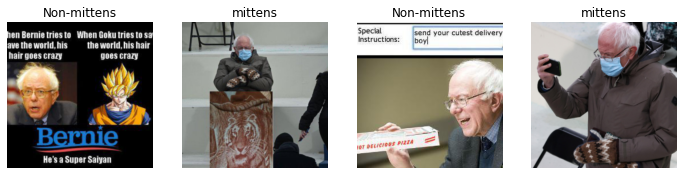

In [13]:
dls.valid.show_batch(max_n=4, nrows=1)

In [5]:
mittens = mittens.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = mittens.dataloaders(path,num_workers=0)

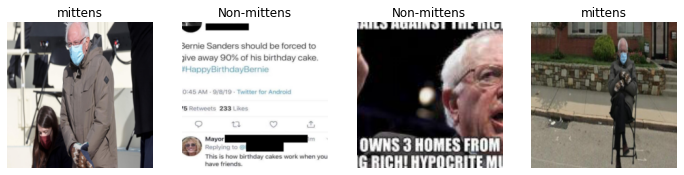

In [15]:
dls.valid.show_batch(max_n=4, nrows=1)

In [6]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)


In [7]:
learn.fit(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.253620,0.407266,0.168831,00:06
1,0.814058,0.378667,0.116883,00:04
2,0.665159,0.286158,0.103896,00:04
3,0.562469,0.181376,0.090909,00:04
4,0.495794,0.140089,0.051948,00:04
5,0.442603,0.113946,0.025974,00:04
6,0.403397,0.098198,0.025974,00:04
7,0.368442,0.084693,0.025974,00:04
8,0.348819,0.084088,0.012987,00:04
9,0.315705,0.079649,0.012987,00:04


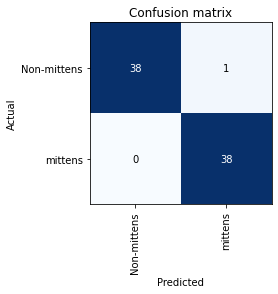

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

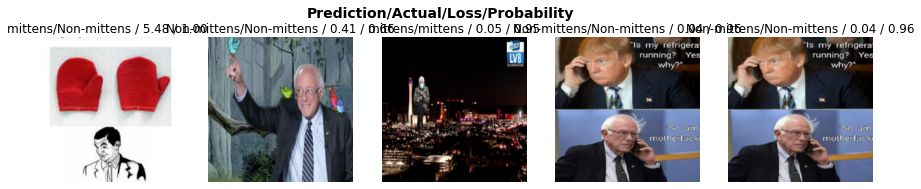

In [9]:
interp.plot_top_losses(5, nrows=1)

In [2]:
learn.export()

NameError: name 'learn' is not defined

In [4]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [5]:
learn_inf = load_learner(path/'export.pkl')

In [6]:
learn_inf.predict('C:/Users/ayall/Downloads/Mitten_03.jpg')

('Non-mittens', tensor(0), tensor([0.6735, 0.3265]))

In [24]:
learn_inf.dls.vocab

['Non-mittens', 'mittens']

In [8]:
from fastbook import *
from fastai.vision.widgets import *

In [9]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [10]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [11]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [12]:
pred,pred_idx,probs = learn_inf.predict(img)

NameError: name 'img' is not defined

In [13]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

NameError: name 'pred' is not defined

In [14]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [15]:
btn_upload = widgets.FileUpload()

In [16]:
VBox([widgets.Label('Mitten Meme?'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [17]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.0 requires pyqt5<5.13, which is not installed.
spyder 4.2.0 requires pyqtwebengine<5.13, which is not installed.
spyder 4.2.0 requires parso==0.7.0, but you have parso 0.7.1 which is incompatible.
nbdev 1.1.11 requires nbconvert<6, but you have nbconvert 6.0.7 which is incompatible.
Enabling: voila
- Writing config: C:\Users\ayall\New folder\envs\Fastai\etc\jupyter
    - Validating...
      voila 0.2.6 ok
